# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

C:\Users\Rae\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [3]:
X_train.shape

(50000, 32, 32, 3)

# Visualize The Data

[5]


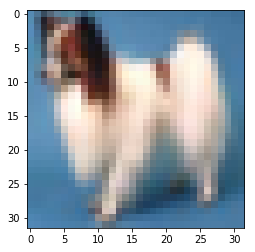

In [4]:
i = 4000
plt.imshow(X_train[i])
print(y_train[i])

C:\Users\Rae\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


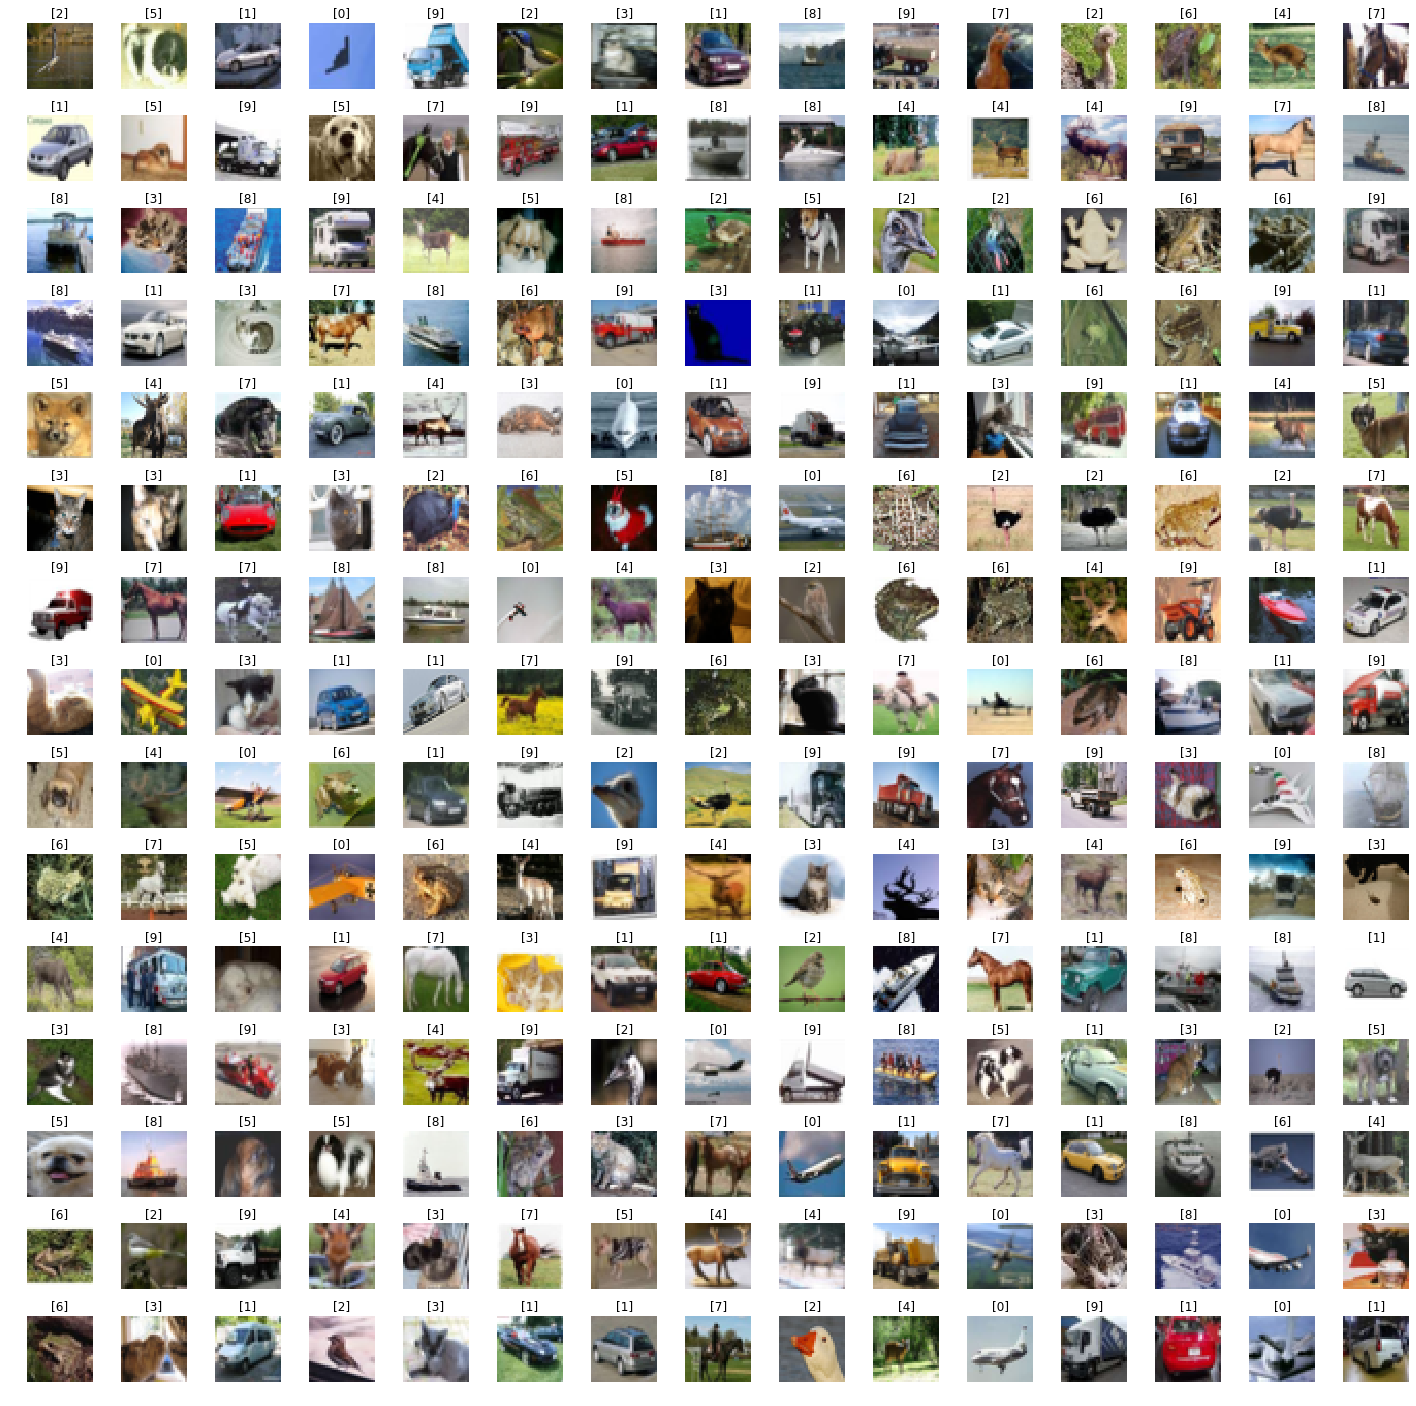

In [5]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

# Data Preperation


In [6]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [7]:
number_cat = 10

In [8]:
#convert catagories from base ten numbers to binary
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [9]:
#normalizing the data
X_train = X_train/255
X_test = X_test/255

In [10]:
Input_shape = X_train.shape[1:]

In [11]:
Input_shape

(32, 32, 3)

# Model Training

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [15]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1000, activation = 'relu'))

cnn_model.add(Dense(units = 1000, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [16]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr=0.001), metrics = ['accuracy'])


In [17]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 10, shuffle = True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
50000/50000 [==============================] - 370s 7ms/step - loss: 1.6076 - acc: 0.4231
Epoch 2/10
50000/50000 [==============================] - 361s 7ms/step - loss: 1.2010 - acc: 0.5851
Epoch 3/10
50000/50000 [==============================] - 358s 7ms/step - loss: 1.1085 - acc: 0.6247
Epoch 4/10
50000/50000 [==============================] - 364s 7ms/step - loss: 1.0700 - acc: 0.6386
Epoch 5/10
50000/50000 [==============================] - 358s 7ms/step - loss: 1.0319 - acc: 0.6565
Epoch 6/10
50000/50000 [==============================] - 8431s 169ms/step - loss: 1.0245 - acc: 0.6599
Epoch 7/10
50000/50000 [==============================] - 362s 7ms/step - loss: 1.0218 - acc: 0.6634
Epoch 8/10
50000/50000 [==============================] - 361s 7ms/step - loss: 1.0236 - acc: 0.6637
Epoch 9/10
50000/50000 [==============================] - 359s 7ms/step - loss: 0.9990 - acc: 0.6725
Epoch 10/10
50000/50000 [===============

In [ ]:
y_train.shape